In [1]:
!pip install -U python-binance

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import datetime as dt

# Downloading BTC Data

In [3]:
from binance.client import Client as bnb_client
from datetime import datetime
import pandas as pd

client  = bnb_client(tld='us')
START   = '2018-01-01'
END     = '2025-11-19'
FREQ    = '1d'
def get_binance_px(symbol, freq, start_ts=START, end_ts=END):
    data = client.get_historical_klines(symbol, freq, start_ts, end_ts)
    cols = ['open_time', 'open', 'high', 'low', 'close', 'volume','close_time', 'quote_volume', 'num_trades','taker_base_volume', 'taker_quote_volume', 'ignore']
    df = pd.DataFrame(data, columns=cols)
    # ms -> datetime
    df['open_time']  = df['open_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    df['close_time'] = df['close_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
    return df
univ = ['BTCUSDT']
px_BTC = {}
for x in univ:
    data_w = get_binance_px(x, FREQ)
    px_BTC[f'{x} Close'] = data_w.set_index('open_time')['close']

px_BTC = pd.DataFrame(px_BTC).astype(float)
px_BTC = px_BTC.reindex(pd.date_range(px_BTC.index[0], px_BTC.index[-1], freq=FREQ))
# returns
ret_BTC = px_BTC.pct_change()

/tmp/ipython-input-3188096712.py:14: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df['open_time']  = df['open_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))
/tmp/ipython-input-3188096712.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df['close_time'] = df['close_time'].map(lambda x: datetime.utcfromtimestamp(x/1000))


# Loading Data


In [4]:
px_w  = pd.read_json("data/CSMOM_OOS_px.json")
vol_w = pd.read_json("data/CSMOM_OOS_vol.json")
ret_w=px_w.pct_change()

/tmp/ipython-input-4127391813.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  ret_w=px_w.pct_change()


In [5]:
vol_w.columns = [c.split()[0] for c in vol_w.columns]
px_w.columns=[c.split()[0] for c in px_w.columns]
ret_w.columns=[c.split()[0] for c in ret_w.columns]
multi=pd.concat({'Volume':vol_w,'Return':ret_w,'Price':px_w})
multi

BTCUSDT       ETHUSDT      DOGEUSDT       SOLUSDT  \
Volume 2023-11-19  7.815318e+08  4.946006e+08  1.370073e+08  4.206474e+08   
       2023-11-20  1.343723e+09  8.540028e+08  1.515663e+08  4.192358e+08   
       2023-11-21  1.756747e+09  9.743041e+08  2.113002e+08  5.864071e+08   
       2023-11-22  1.657141e+09  9.437765e+08  8.358002e+07  4.373267e+08   
       2023-11-23  8.888266e+08  5.174823e+08  4.654310e+07  2.841480e+08   
...                         ...           ...           ...           ...   
Price  2025-11-27  9.133395e+04  3.015230e+03  1.526400e-01  1.408500e+02   
       2025-11-28  9.089070e+04  3.031150e+03  1.501700e-01  1.373300e+02   
       2025-11-29  9.080244e+04  2.989160e+03  1.483700e-01  1.359100e+02   
       2025-11-30  9.036000e+04  2.991260e+03  1.459900e-01  1.334800e+02   
       2025-12-01  8.628601e+04  2.799070e+03  1.354700e-01  1.266600e+02   

                        ADAUSDT       XRPUSDT       DOTUSDT      AVAXUSDT  \
Volume 2023-11-19  3.838797e+07  1.479819e+08  2.821621e+07  1.155293e+08   
       2023-11-20  5.163725e+07  1.848393e+08  3.364006e+07  1.285389e+08   
       2023-11-21  6.305669e+07  2.821786e+08  4.986445e+07  2.330431e+08   
       2023-11-22  3.492561e+07  2.068500e+08  3.229474e+07  1.253109e+08   
       2023-11-23  2.604426e+07  1.879626e+08  1.570526e+07  6.534480e+07   
...                         ...           ...           ...           ...   
Price  2025-11-27  4.331000e-01  2.199900e+00  2.337000e+00  1.502000e+01   
       2025-11-28  4.199000e-01  2.179500e+00  2.284000e+00  1.484000e+01   
       2025-11-29  4.147000e-01  2.200900e+00  2.259000e+00  1.425000e+01   
       2025-11-30  4.143000e-01  2.155000e+00  2.210000e+00  1.371000e+01   
       2025-12-01  3.856000e-01  2.029700e+00  2.042000e+00  1.276000e+01   

                       SHIBUSDT      LUNAUSDT  ...      WAXPUSDT  \
Volume 2023-11-19  1.847102e+07  1.196682e+07  ...  2.685282e+06   
       2023-11-20  2.658720e+07  1.069117e+07  ...  2.582456e+06   
       2023-11-21  3.835365e+07  1.598386e+07  ...  4.066115e+06   
       2023-11-22  2.195484e+07  3.069587e+07  ...  2.069615e+06   
       2023-11-23  1.203885e+07  1.678948e+07  ...  1.144960e+06   
...                         ...           ...  ...           ...   
Price  2025-11-27  8.760000e-06  7.470000e-02  ...  9.780000e-03   
       2025-11-28  8.640000e-06  7.380000e-02  ...  9.620000e-03   
       2025-11-29  8.530000e-06  7.260000e-02  ...  9.500000e-03   
       2025-11-30  8.370000e-06  7.220000e-02  ...  8.960000e-03   
       2025-12-01  7.970000e-06  6.790000e-02  ...  8.600000e-03   

                       ANKRUSDT       ZENUSDT        SCUSDT     AUDIOUSDT  \
Volume 2023-11-19  4.593588e+06  2.396445e+06  7.368242e+06  2.031541e+06   
       2023-11-20  5.524734e+06  3.120775e+06  6.505197e+06  2.463841e+06   
       2023-11-21  5.926834e+06  5.817753e+06  1.309182e+07  4.038145e+06   
       2023-11-22  3.786246e+06  4.356441e+06  5.008137e+06  1.977132e+06   
       2023-11-23  3.136172e+06  1.802076e+06  1.635249e+06  1.535014e+06   
...                         ...           ...           ...           ...   
Price  2025-11-27  8.250000e-03  1.181400e+01  1.692000e-03  3.460000e-02   
       2025-11-28  8.090000e-03  1.118900e+01  1.677000e-03  3.440000e-02   
       2025-11-29  8.020000e-03  1.073400e+01  1.704000e-03  3.440000e-02   
       2025-11-30  7.740000e-03  1.033700e+01  1.687000e-03  3.420000e-02   
       2025-12-01  7.480000e-03  9.852000e+00  1.613000e-03  3.230000e-02   

                        LPTUSDT       ICXUSDT      ROSEUSDT       RVNUSDT  \
Volume 2023-11-19  2.029338e+06  1.543603e+06  1.245309e+07  1.453351e+06   
       2023-11-20  2.670023e+06  1.705314e+06  1.478426e+07  1.672598e+06   
       2023-11-21  3.905509e+06  3.472112e+06  1.518866e+07  2.983141e+06   
       2023-11-22  4.378457e+06  2.356935e+06  1.152571e+07  2.261029e+06   
       2023-11-23  1.677215e+06  2.393015e+06  

# Signal Construction

In [6]:
#CSMOM Signal
def CSMOM(ret_w, lookback_per, k):
   mom = (1 + ret_w).rolling(lookback_per).apply(lambda x: x.prod() - 1, raw=True)#TSMOM signal
   ranked = mom.rank(axis=1, ascending=False, method='first')#ranks coins
   n_valid=ranked.notna().sum(axis=1)
   k_eff=(n_valid//2).clip(upper=k)#max number of position
   longs=ranked.le(k_eff,axis=0)#Creates long dataframe
   shorts = ranked.gt(n_valid - k_eff, axis=0)
   sig = longs.astype(int) - shorts.astype(int)#converts true/false dataframes into 1/0
   sig = sig.shift(1).fillna(0)#shifts signal to prevent lookahead bias
   return sig

#Constructing WML Portfolio

In [7]:
def WML(sig):
  Winners=(sig==1).astype(int)#Long's dataframe
  Losers=(sig==-1).astype(int)#Short's dataframe
  return Winners, Losers

# Constructing ADV Weighted Portfolio

In [8]:

#Step 3 Volume weighting
def weights(Long, Short, vol_w,scale):
  vol= vol_w.shift(1).fillna(0) #prevents lookahead bias
  long_dollar= vol*Long
  short_dollar= vol*Short
  long_totvol= long_dollar.sum(axis=1) #computes total volume in long leg
  short_totvol= short_dollar.sum(axis=1) #computes total volume in short leg
  long_weights= long_dollar.div(long_totvol.replace(0,pd.NA),axis=0)
  short_weights= short_dollar.div(short_totvol.replace(0,pd.NA),axis=0)
  long_weights= long_weights.fillna(0) #weights for long leg
  short_weights= short_weights.fillna(0) #weights for short leg
  long_weights= scale*long_weights
  short_weights= -scale*short_weights
  W=long_weights+short_weights
  return W

def holding_per(W,days):
  W_reb=W.copy()
  W_reb.iloc[1:]=np.nan
  W_reb.iloc[::days]=W.iloc[::days]
  W_reb=W_reb.ffill()
  return W_reb

# Applying Regime Filter to Weights

In [9]:
def regime_filter(px_BTC, w_index, fast_MA, slow_MA):

    btc_close = px_BTC['BTCUSDT Close']
    btc_ma_fast = btc_close.rolling(fast_MA).mean()
    btc_ma_slow = btc_close.rolling(slow_MA).mean()

    regime_raw = pd.Series(index=btc_close.index)
    regime_raw[btc_close <= btc_ma_fast] = -1
    regime_raw[(btc_close > btc_ma_fast) & (btc_close <= btc_ma_slow)] = 0
    regime_raw[btc_close > btc_ma_slow] = 1

    regime_state = regime_raw.shift(1)
    regime_state = regime_state.reindex(w_index).ffill().fillna(0).astype('int')

    long_scale  = pd.Series(0.50, index=w_index)
    short_scale = pd.Series(0.50, index=w_index)

    long_scale[regime_state == -1]  = 0.40 #Bear
    short_scale[regime_state == -1] = 0.60

    long_scale[regime_state == 1]   = 0.60 #Bull
    short_scale[regime_state == 1]  = 0.40

    return long_scale, short_scale, regime_state


In [10]:
#Function Call
lookback= CSMOM(ret_w,14,15)
Long, Short= WML(lookback)
W_daily= weights(Long, Short, vol_w, 1.0)
W= holding_per(W_daily,5)
long_scale, short_scale, regime_state = regime_filter(px_BTC, W.index, fast_MA=200, slow_MA=365)

W_long  = W.clip(lower=0)
W_short = W.clip(upper=0)

W_regime = (W_long.mul(long_scale, axis=0)+W_short.mul(short_scale, axis=0))

/tmp/ipython-input-144322753.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  long_weights= long_weights.fillna(0) #weights for long leg
/tmp/ipython-input-144322753.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  short_weights= short_weights.fillna(0) #weights for short leg


# Sharpe Calculation

In [11]:
to=(W_regime-W_regime.shift().fillna(0)).abs().sum(1)
to.mean()
gross_ret=(W_regime*ret_w).sum(1)
tcost_bps=20
net_ret=gross_ret.subtract(to*tcost_bps*1e-4,fill_value=0)
net_sharpe=net_ret.mean()/net_ret.std()*np.sqrt(365)
net_sharpe

np.float64(1.160887687502305)

In [12]:
gross_sharpe=gross_ret.mean()/gross_ret.std()*np.sqrt(365)
gross_sharpe

np.float64(1.6809376902570567)

In [13]:
btc_ret = ret_BTC['BTCUSDT Close'].loc['2023-11-19':'2025-11-19'].dropna()
btc_cum_curve = (1 + btc_ret).cumprod()
btc_cum_return = btc_cum_curve.iloc[-1] - 1
btc_sharpe = btc_ret.mean() / btc_ret.std()*np.sqrt(365)
print('cumulative return=',btc_cum_return)
print('Annulaised vol',btc_ret.std()*np.sqrt(365))
print('Sharpe=',btc_sharpe)

cumulative return= 1.4950336092424101
Annulaised vol 0.47620454470571333
Sharpe= 1.194252253009239


# Linear Regression

In [14]:
import statsmodels.api as sm
df = pd.concat([net_ret.rename("y"), btc_ret.rename("x")], axis=1).dropna()
X = sm.add_constant(df["x"])
Y = df["y"]

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     48.98
Date:                Sat, 31 Jan 2026   Prob (F-statistic):           5.86e-12
Time:                        20:38:31   Log-Likelihood:                 1965.8
No. Observations:                 732   AIC:                            -3928.
Df Residuals:                     730   BIC:                            -3918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.001      1.380      0.168      -0.000       0.002
x              0.1716      0.025      6.999      0.000       0.123       0.220
==============================================================================
Omnibus:                      268.371   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4065.676
Skew:                           1.220   Prob(JB):                         0.00
Kurtosis:                      14.285   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
beta_contr=results.params['x']*X['x']
prediction=results.params['x']*X['x']+results.params['const']
alpha_contr=results.params['const']+results.resid

alpha=alpha_contr.mean()
alpha

np.float64(0.0008443549055465123)

In [16]:
beta=beta_contr.mean()
beta

np.float64(0.000267330687721834)

In [17]:
Information_ratio=alpha/alpha_contr.std()*np.sqrt(365)
Information_ratio

np.float64(0.9770547899292461)

In [18]:
alpha_tstat=results.tvalues['const']
alpha_tstat

np.float64(1.3800116791342443)

# Drawdowns and Equity Curve

In [19]:
def drawdown(px):
  return(px/px.expanding(min_periods=1).max()-1)
pos=(1+net_ret).cumprod()
dd=drawdown(pos)
max_dd=-dd.min()
max_dd

0.29729265490550116

,0
equity,247


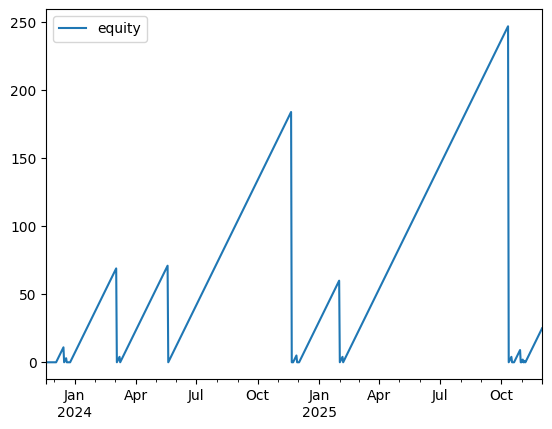

In [20]:
def duration(pos):
    peak = pos.expanding(min_periods=1).max()
    res = pd.DataFrame(index=pos.index,columns=pos.columns)
    for col in pos.columns:
        for dt in pos.index:
            if pos.loc[dt,col] >= peak.loc[dt,col]:
                 res.loc[dt,col] = 0
            else:
                res.loc[dt,col] = res.loc[:dt,col].iloc[-2] + 1
    return res
ddd = duration(pos.to_frame("equity"))
ddd.plot()

ddd.max()

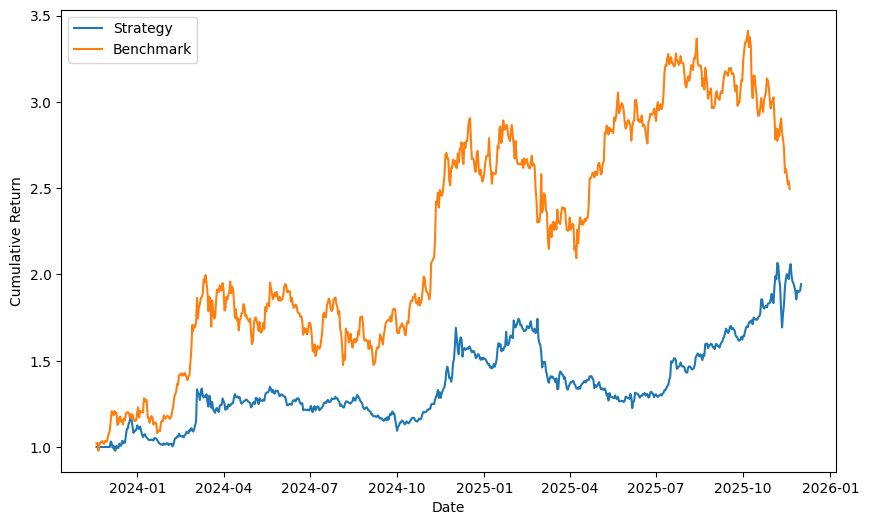

In [21]:
strat_cum=(1+net_ret).cumprod()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(strat_cum, label="Strategy")
plt.plot(btc_cum_curve, label="Benchmark")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.show()

# Grid Search

In [ ]:
lookbacks    = [5,7,10,14]
hold_periods = [3,5,7,8,10]
ks           = [12,15,18,20,25]

tcost_bps    = 20
results      = []

for lb in lookbacks:
    for k in ks:

        sig = CSMOM(ret_w, lb, k)
        Long, Short = WML(sig)

        W_daily = weights(Long, Short, vol_w, scale=1.0)

        for days in hold_periods:
            W = holding_per(W_daily, days)
            long_scale, short_scale, regime_state = regime_filter(px_BTC, W.index, fast_MA=200, slow_MA=360)

            W_long  = W.clip(lower=0)
            W_short = W.clip(upper=0)

            W_regime = (W_long.mul(long_scale, axis=0) + W_short.mul(short_scale, axis=0))

            to = (W_regime - W_regime.shift(1).fillna(0)).abs().sum(1)

            ret_aligned = ret_w.reindex(W_regime.index)
            gross_ret = (W_regime * ret_aligned).sum(1)
            sharpe_gross = gross_ret.mean() / gross_ret.std() * np.sqrt(365)

            net_ret = gross_ret - to * tcost_bps * 1e-4
            sharpe_net = net_ret.mean() / net_ret.std() * np.sqrt(365)

            results.append({"lookback": lb,"k": k,"hold": days,"sharpe_net": sharpe_net,"sharpe_gross": sharpe_gross,})

results_df = pd.DataFrame(results).sort_values("sharpe_net", ascending=False)
print(results_df.head(20).to_string(index=False))
